In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset in IDE and checking the first 5 rows
df=pd.read_csv('ecommerce_orders.csv')
df.head()

,order_id,user_id,product_category,price,discount,quantity,order_status,order_date
0,1,206,Home,47371,15,5,Returned,2023-09-21
1,2,168,Sports,34396,0,4,Cancelled,2022-03-08
2,3,244,Home,65684,20,2,Delivered,2025-01-31
3,4,34,Beauty,63284,0,3,Cancelled,2021-12-10
4,5,166,Home,3370,5,4,Returned,2025-01-10


In [3]:
#Sum of duplicates in the dataset
df.duplicated().sum()

np.int64(0)

In [4]:
#Summary of the dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,800.0,NaN,NaN,NaN,400.5,231.0844,1.0,200.75,400.5,600.25,800.0
user_id,800.0,NaN,NaN,NaN,146.8325,86.746372,1.0,72.0,145.5,219.0,300.0
product_category,800,5,Home,187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,800.0,NaN,NaN,NaN,39694.0,22645.142432,507.0,20025.0,38835.0,58974.0,79963.0
discount,800.0,NaN,NaN,NaN,10.275,6.967608,0.0,5.0,10.0,15.0,20.0
quantity,800.0,NaN,NaN,NaN,2.98375,1.438253,1.0,2.0,3.0,4.0,5.0
order_status,800,3,Returned,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_date,800,634,2025-01-10,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Missing values in the dataset
df.isnull().sum()

order_id            0
user_id             0
product_category    0
price               0
discount            0
quantity            0
order_status        0
order_date          0
dtype: int64

In [6]:
#Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_id          800 non-null    int64 
 1   user_id           800 non-null    int64 
 2   product_category  800 non-null    object
 3   price             800 non-null    int64 
 4   discount          800 non-null    int64 
 5   quantity          800 non-null    int64 
 6   order_status      800 non-null    object
 7   order_date        800 non-null    object
dtypes: int64(5), object(3)
memory usage: 50.1+ KB


In [7]:
df['order_date']=pd.to_datetime(df['order_date'])

In [8]:
#Count total orders in the dataset.
df['order_id'].nunique()

800

In [9]:
#Count total unique users.
df['user_id'].nunique()

285

In [10]:
#List all distinct product categories.
df['product_category'].unique()

array(['Home', 'Sports', 'Beauty', 'Fashion', 'Electronics'], dtype=object)

In [11]:
#Find the total quantity sold.
df['quantity'].sum()

np.int64(2387)

In [12]:
#Find the average price of products.
df['price'].mean()

np.float64(39694.0)

In [13]:
#Find the highest and lowest priced per products category.
df.groupby('product_category')['price'].agg(['min','max'])

,min,max
product_category,,
Beauty,575,79761
Electronics,536,79963
Fashion,4879,79886
Home,690,79866
Sports,507,79838


In [14]:
#Find the highest and lowest priced products.
print(f'Max product price: {df['price'].max()}')

print(f'Min product price: {df['price'].min()}')

Max product price: 79963
Min product price: 507


In [15]:
#Count orders by order status.
df['order_status'].value_counts()

order_status
Returned     281
Cancelled    264
Delivered    255
Name: count, dtype: int64

In [16]:
#Find total cancelled orders.
cancelled_orders=df[df['order_status']=='Cancelled'].shape[0]
print(f'Total Cancelled Orders: {cancelled_orders}')

Total Cancelled Orders: 264


In [17]:
#Find total returned orders.
returned_orders=df[df['order_status']=='Returned'].shape[0]
print(f'Total Returned Orders: {returned_orders}')

Total Returned Orders: 281


In [18]:
#Find the date of the first and last order.
print(f'Date of the first order: {df['order_date'].min()}')
print(f'Date of the last order: {df['order_date'].max()}')

Date of the first order: 2021-01-03 00:00:00
Date of the last order: 2025-02-05 00:00:00


In [19]:
df['total_gross_revenue']=df['price'] * df['quantity']

In [20]:
df['net_revenue']=(df['price'] - df['discount']) * df['quantity']

In [21]:
df.head(2)

,order_id,user_id,product_category,price,discount,quantity,order_status,order_date,total_gross_revenue,net_revenue
0,1,206,Home,47371,15,5,Returned,2023-09-21,236855,236780
1,2,168,Sports,34396,0,4,Cancelled,2022-03-08,137584,137584


In [22]:
#Calculate total gross revenue (price × quantity).
df['total_gross_revenue'].sum()

np.int64(94254292)

In [23]:
#Calculate total discount amount given.
df['discount'].sum()

np.int64(8220)

In [24]:
#Find average order value (AOV).
order_total=df.groupby('order_id')['total_gross_revenue'].sum()
aov=order_total.mean()
print(f'Average order value: {aov:.2f}')

Average order value: 117817.87


In [25]:
#Find revenue per product category.
df.groupby('product_category')['total_gross_revenue'].sum()

product_category
Beauty         18626123
Electronics    20154099
Fashion        14897930
Home           21118549
Sports         19457591
Name: total_gross_revenue, dtype: int64

In [26]:
#Find average revenue per order by category
df.groupby('product_category')['total_gross_revenue'].mean().round(2)

product_category
Beauty         120168.54
Electronics    114511.93
Fashion        127332.74
Home           112933.42
Sports         117924.79
Name: total_gross_revenue, dtype: float64

In [27]:
#Identify the most profitable category.
df['profit']=df['total_gross_revenue'] - df['net_revenue']
most_profitable=df.groupby('product_category')['profit'].sum().idxmax()
print(f'The most profitable category is: {most_profitable}')

The most profitable category is: Home


In [28]:
#Find revenue lost due to cancelled orders.
df[df['order_status']=='Cancelled']['total_gross_revenue'].sum()

np.int64(29382952)

In [29]:
#Find revenue lost due to returned orders.
df[df['order_status']=='Returned']['total_gross_revenue'].sum()

np.int64(34013189)

In [30]:
#Calculate net revenue per user.
df.groupby('user_id')['net_revenue'].sum()

user_id
1      255016
3      124490
4      626902
5      414351
6      323025
        ...  
296    719599
297     66083
298     76620
299    166591
300     93640
Name: net_revenue, Length: 285, dtype: int64

In [31]:
#Count orders per user.
df.groupby('user_id')['order_id'].count()

user_id
1      2
3      3
4      8
5      2
6      1
      ..
296    3
297    2
298    1
299    2
300    2
Name: order_id, Length: 285, dtype: int64

In [32]:
#Find users with more than 5 orders.
df.groupby('user_id').filter(lambda x: len(x) > 5)

,order_id,user_id,product_category,price,discount,quantity,order_status,order_date,total_gross_revenue,net_revenue,profit
12,13,66,Fashion,12807,10,5,Cancelled,2022-10-13,64035,63985,50
14,15,4,Fashion,25689,10,1,Delivered,2024-02-07,25689,25679,10
17,18,56,Beauty,56954,0,1,Returned,2022-02-01,56954,56954,0
18,19,42,Sports,72302,5,2,Returned,2023-06-27,144604,144594,10
32,33,72,Sports,57695,10,4,Returned,2021-10-22,230780,230740,40
...,...,...,...,...,...,...,...,...,...,...,...
773,774,153,Home,64067,10,5,Cancelled,2021-06-01,320335,320285,50
778,779,150,Fashion,13834,15,4,Delivered,2024-03-18,55336,55276,60
782,783,264,Sports,4901,20,5,Delivered,2022-01-24,24505,24405,100
792,793,113,Fashion,21335,0,1,Cancelled,2024-10-23,21335,21335,0


In [33]:
#Find users with more than 5 orders.
frequent_users=df['user_id'].value_counts()
frequent_users=frequent_users[frequent_users>5].index.tolist()
frequent_users

[4,
 52,
 153,
 114,
 72,
 66,
 289,
 150,
 42,
 56,
 113,
 151,
 287,
 75,
 31,
 264,
 26,
 30,
 130,
 221]

In [34]:
#Identify top 10 users by total spending.
df.groupby('user_id')['net_revenue'].sum().sort_values(ascending=False).head(10)

user_id
153    944207
114    931150
278    930237
217    905725
26     904993
107    881561
110    863346
101    854127
265    842058
139    834391
Name: net_revenue, dtype: int64

In [35]:
#Find users who only placed one order.
#To find the order details
df.groupby('user_id').filter(lambda x: len(x)==1)

,order_id,user_id,product_category,price,discount,quantity,order_status,order_date,total_gross_revenue,net_revenue,profit
15,16,255,Beauty,58755,10,1,Cancelled,2024-06-25,58755,58745,10
27,28,6,Sports,64620,15,5,Returned,2024-08-17,323100,323025,75
61,62,247,Beauty,63119,5,4,Cancelled,2023-11-02,252476,252456,20
124,125,174,Electronics,62325,20,1,Cancelled,2023-06-29,62325,62305,20
126,127,235,Beauty,10007,20,5,Returned,2021-11-13,50035,49935,100
143,144,15,Electronics,43873,10,5,Cancelled,2025-01-10,219365,219315,50
148,149,267,Sports,44445,0,3,Cancelled,2021-06-29,133335,133335,0
182,183,112,Sports,54988,15,3,Returned,2021-11-02,164964,164919,45
191,192,126,Beauty,33336,10,2,Returned,2022-07-01,66672,66652,20
199,200,149,Beauty,61442,15,5,Returned,2024-06-29,307210,307135,75


In [36]:
#Find users who only placed one order.
one_order_user=df['user_id'].value_counts()
one_order_user=one_order_user[one_order_user==1].index.tolist()
one_order_user

[63,
 144,
 141,
 269,
 293,
 105,
 179,
 295,
 232,
 129,
 243,
 255,
 96,
 239,
 175,
 197,
 228,
 256,
 285,
 258,
 266,
 249,
 222,
 198,
 145,
 79,
 207,
 84,
 174,
 218,
 112,
 251,
 60,
 211,
 134,
 267,
 282,
 15,
 180,
 126,
 149,
 235,
 215,
 160,
 226,
 81,
 68,
 284,
 203,
 247,
 92,
 12,
 298,
 237,
 170,
 39,
 6,
 36]

In [37]:
#Find users who placed orders in multiple categories.
multi_cat_users=df.groupby('user_id')['product_category'].nunique()
multi_cat_users=multi_cat_users[multi_cat_users>1].index.tolist()
multi_cat_users

[1,
 3,
 4,
 5,
 7,
 8,
 9,
 10,
 11,
 13,
 14,
 16,
 18,
 19,
 20,
 21,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 37,
 38,
 40,
 42,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 61,
 62,
 64,
 65,
 66,
 67,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 80,
 82,
 83,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 93,
 94,
 95,
 97,
 98,
 100,
 101,
 102,
 103,
 104,
 107,
 108,
 109,
 110,
 111,
 113,
 114,
 115,
 116,
 117,
 118,
 120,
 122,
 123,
 125,
 128,
 130,
 131,
 132,
 133,
 135,
 136,
 137,
 138,
 139,
 140,
 142,
 143,
 146,
 147,
 148,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 161,
 162,
 163,
 164,
 165,
 167,
 168,
 169,
 173,
 176,
 177,
 178,
 181,
 182,
 183,
 184,
 185,
 187,
 188,
 189,
 191,
 194,
 195,
 196,
 199,
 200,
 202,
 204,
 205,
 206,
 208,
 209,
 210,
 212,
 213,
 214,
 216,
 217,
 219,
 221,
 224,
 225,
 227,
 229,
 230,
 233,
 236,
 238,
 240,
 241,
 242,
 244,
 245,
 246,
 248,
 250,
 252,


In [38]:
#Calculate repeat purchase rate.
user_counts=df.groupby('user_id').size()#count orders per user
repeat_customers=(user_counts > 1).sum()#count users with more than 1 order
total_customers=len(user_counts)#total unique customers
repeat_purchase_rate=(repeat_customers/total_customers) * 100 #repeat rate

print(f'Repeat Purchase RAte: {repeat_purchase_rate:.2f}')

Repeat Purchase RAte: 79.65


In [39]:
df['quantity'].mean()

np.float64(2.98375)

In [40]:
#Find the average quantity purchased per oder
total_qty_per_order=df.groupby('order_id')['quantity'].sum()
avg_qty_per_order=total_qty_per_order.mean()
avg_qty_per_order

np.float64(2.98375)

In [41]:
#Identify users with highest average basket size
#basket size= quantity size
order_total=df.groupby(['user_id','order_id'])['quantity'].sum().reset_index()
user_avg_basket=order_total.groupby('user_id')['quantity'].mean().sort_values(ascending=False)
user_avg_basket.head()

user_id
12     5.0
266    5.0
36     5.0
235    5.0
60     5.0
Name: quantity, dtype: float64

In [42]:
#Find users who returned more than 30% of their orders.
df['is_returned']=df['order_status']=='Returned'#boolen for return
user_stats=df.groupby('user_id')['is_returned'].mean().reset_index()#calculating return rate
user_stats.columns=['user_id','return_rate']
high_return_users=user_stats[user_stats['return_rate']>0.3]#filter foe users > 30%
high_return_users

,user_id,return_rate
2,4,0.375000
4,6,1.000000
5,7,0.333333
7,9,0.500000
11,13,0.600000
...,...,...
274,290,1.000000
276,292,0.500000
278,294,0.600000
281,297,0.500000


In [43]:
#Find users with cancelled orders only.
df[df['order_status']=='Cancelled']

,order_id,user_id,product_category,price,discount,quantity,order_status,order_date,total_gross_revenue,net_revenue,profit,is_returned
1,2,168,Sports,34396,0,4,Cancelled,2022-03-08,137584,137584,0,False
3,4,34,Beauty,63284,0,3,Cancelled,2021-12-10,189852,189852,0,False
10,11,216,Home,6916,0,3,Cancelled,2021-12-03,20748,20748,0,False
12,13,66,Fashion,12807,10,5,Cancelled,2022-10-13,64035,63985,50,False
15,16,255,Beauty,58755,10,1,Cancelled,2024-06-25,58755,58745,10,False
...,...,...,...,...,...,...,...,...,...,...,...,...
783,784,278,Home,62055,0,5,Cancelled,2023-06-15,310275,310275,0,False
784,785,145,Sports,15262,0,2,Cancelled,2024-03-28,30524,30524,0,False
786,787,139,Electronics,56691,20,4,Cancelled,2022-04-26,226764,226684,80,False
792,793,113,Fashion,21335,0,1,Cancelled,2024-10-23,21335,21335,0,False


In [44]:
#Find top 3 categories by revenue.
df.groupby('product_category')['total_gross_revenue'].sum().sort_values(ascending=False).head(3)

product_category
Home           21118549
Electronics    20154099
Sports         19457591
Name: total_gross_revenue, dtype: int64

In [45]:
#Find categories with highest return rate.
df['is_returned']=(df['order_status']=='Returned').astype(int)
category_returns=df.groupby('product_category')['is_returned'].mean().sort_values(ascending=False)
category_returns_pct=category_returns*100
category_returns_pct.round(2)

product_category
Home           37.97
Sports         36.36
Electronics    35.80
Fashion        32.48
Beauty         31.61
Name: is_returned, dtype: float64

In [46]:
#Find categories with highest cancellation rate.
df['is_cancelled']=(df['order_status']=='Cancelled').astype(int)
category_cancel=df.groupby('product_category')['is_cancelled'].mean().sort_values(ascending=False)
category_cancel_pct=category_cancel*100
category_cancel_pct

product_category
Sports         39.393939
Beauty         32.258065
Electronics    31.818182
Fashion        31.623932
Home           29.946524
Name: is_cancelled, dtype: float64

In [47]:
#Find average discount per category.
df.groupby('product_category')['discount'].mean().sort_values(ascending=False)

product_category
Beauty         10.677419
Home           10.588235
Sports         10.424242
Electronics     9.801136
Fashion         9.743590
Name: discount, dtype: float64

In [48]:
#Identify categories with heavy discount dependency.
df['discount_rate']=df['discount']/df['total_gross_revenue']#discount rate for every row
avg_discount=df['discount_rate'].mean()#average discount rate
category_stats=df.groupby('product_category')['discount_rate'].mean().reset_index()#specific averages by category
heavy_dependency=category_stats[category_stats['discount_rate']>avg_discount]#categories that exceed average rate
print(f'Average Discount: {avg_discount:.2%}')
print('Categories exceeding the average: ')
print(heavy_dependency.sort_values(by='discount_rate',ascending=False))

Average Discount: 0.03%
Categories exceeding the average: 
  product_category  discount_rate
3             Home       0.000456
4           Sports       0.000320


In [49]:
#Find categories with low sales but high revenue.

In [50]:
#Find most frequently purchased category.
df['product_category'].value_counts().idxmax()

'Home'

In [51]:
#Find least purchased category.
df['product_category'].value_counts().idxmin()

'Fashion'

In [52]:
category_counts=df['product_category'].value_counts()
top_category=category_counts.idxmax()
top_value=category_counts.max()

bottom_category=category_counts.idxmin()
bottom_value=category_counts.min()

print(f'The most frequently prurchased category is: {top_category} with {top_value} orders')
print()
print(f'The least purchased category is: {bottom_category} with {bottom_value} orders')

The most frequently prurchased category is: Home with 187 orders

The least purchased category is: Fashion with 117 orders


In [53]:
#Identify seasonal category trends

In [54]:
#Rank categories by revenue contribution.

In [55]:
#Count orders per month.
df.groupby(df['order_date'].dt.to_period('M'))['order_id'].nunique()

order_date
2021-01    15
2021-02    15
2021-03    19
2021-04    27
2021-05    15
2021-06    20
2021-07    19
2021-08    22
2021-09    16
2021-10    17
2021-11    17
2021-12    21
2022-01    16
2022-02    10
2022-03    15
2022-04    20
2022-05    18
2022-06    14
2022-07    20
2022-08    14
2022-09    13
2022-10    15
2022-11    14
2022-12    17
2023-01    13
2023-02    13
2023-03    16
2023-04    16
2023-05     6
2023-06    26
2023-07    16
2023-08    13
2023-09    16
2023-10    11
2023-11    15
2023-12    25
2024-01    15
2024-02    12
2024-03    13
2024-04    15
2024-05    14
2024-06    15
2024-07    16
2024-08    16
2024-09    12
2024-10    23
2024-11    18
2024-12    13
2025-01    21
2025-02     2
Freq: M, Name: order_id, dtype: int64

In [56]:
#Calculate monthly revenue.
df.groupby(df['order_date'].dt.to_period('M'))['total_gross_revenue'].sum()

order_date
2021-01    1970198
2021-02    1471044
2021-03    2213887
2021-04    3497228
2021-05    1089909
2021-06    3212786
2021-07    2676537
2021-08    2962092
2021-09    2083241
2021-10    2425085
2021-11    1700397
2021-12    2123039
2022-01    1658475
2022-02     973273
2022-03    1547784
2022-04    2259352
2022-05    2214219
2022-06    2141347
2022-07    2391536
2022-08    1565693
2022-09    1198757
2022-10    1686755
2022-11    2152566
2022-12    1447795
2023-01    1498844
2023-02    1509226
2023-03    2352751
2023-04    2094423
2023-05     819071
2023-06    3241123
2023-07    1787595
2023-08    1409721
2023-09    1991090
2023-10    1165052
2023-11    1986901
2023-12    2408189
2024-01    1372002
2024-02    1645710
2024-03    1121941
2024-04    1741746
2024-05    1768634
2024-06    1274069
2024-07    2348240
2024-08    2252635
2024-09    1712065
2024-10    2431421
2024-11    1901362
2024-12    1245407
2025-01    1999495
2025-02     512584
Freq: M, Name: total_gross_revenue, dty

In [57]:
#Find best performing month by revenue.
df.groupby(df['order_date'].dt.to_period('M'))['total_gross_revenue'].sum().idxmax()

Period('2021-04', 'M')

In [58]:
#Identify worst performing month by revenue.
df.groupby(df['order_date'].dt.to_period('M'))['total_gross_revenue'].sum().idxmin()

Period('2025-02', 'M')

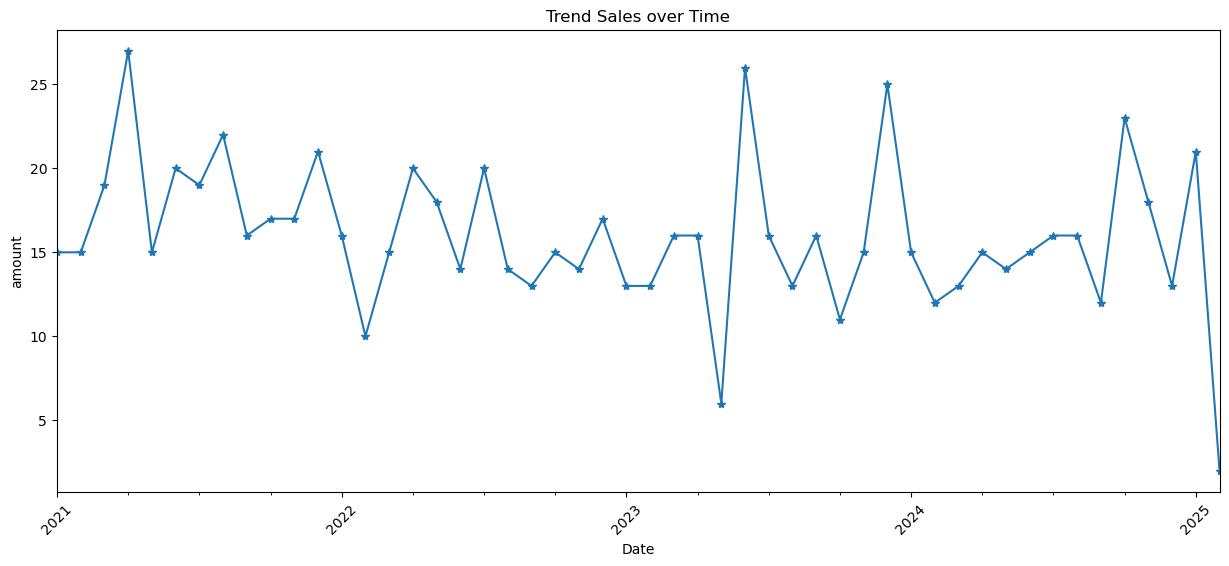

In [59]:
#Analyze order trends over time by Month.
plt.figure(figsize=(15,6))
trend_sales=df.groupby(df['order_date'].dt.to_period('M'))['order_id'].nunique()
trend_sales.plot(kind='line', marker='*')
plt.title('Trend Sales over Time')
plt.xlabel('Date')
plt.ylabel('amount')
plt.xticks(rotation=45)
plt.show()

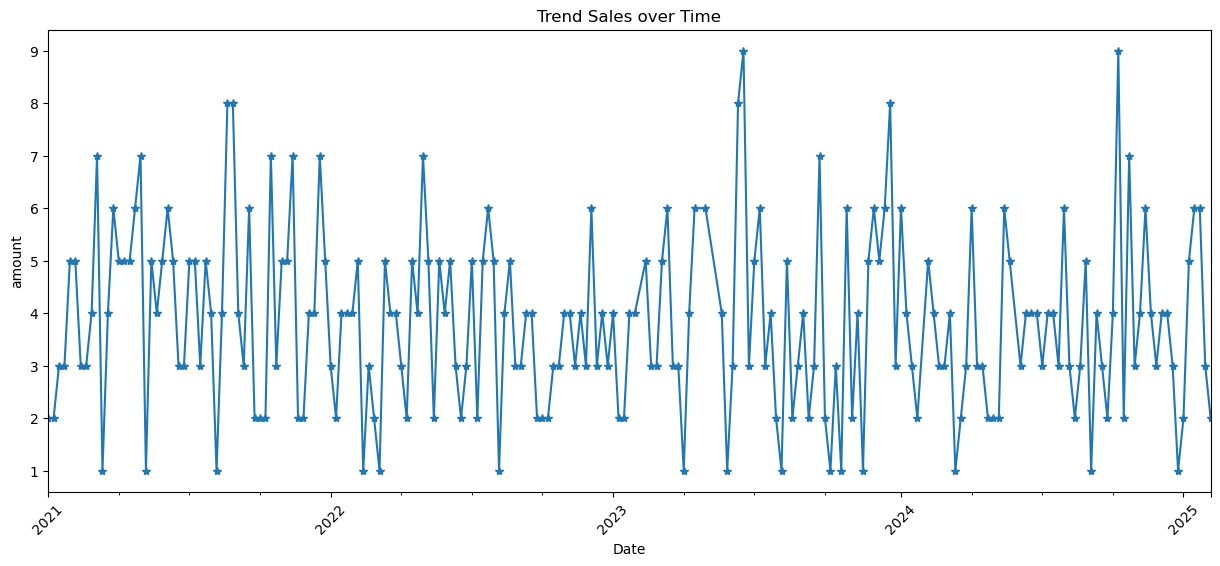

In [60]:
##Analyze order trends over time by Week.
plt.figure(figsize=(15,6))
trend_sales=df.groupby(df['order_date'].dt.to_period('W'))['order_id'].nunique()
trend_sales.plot(kind='line', marker='*')
plt.title('Trend Sales over Time')
plt.xlabel('Date')
plt.ylabel('amount')
plt.xticks(rotation=45)
plt.show()

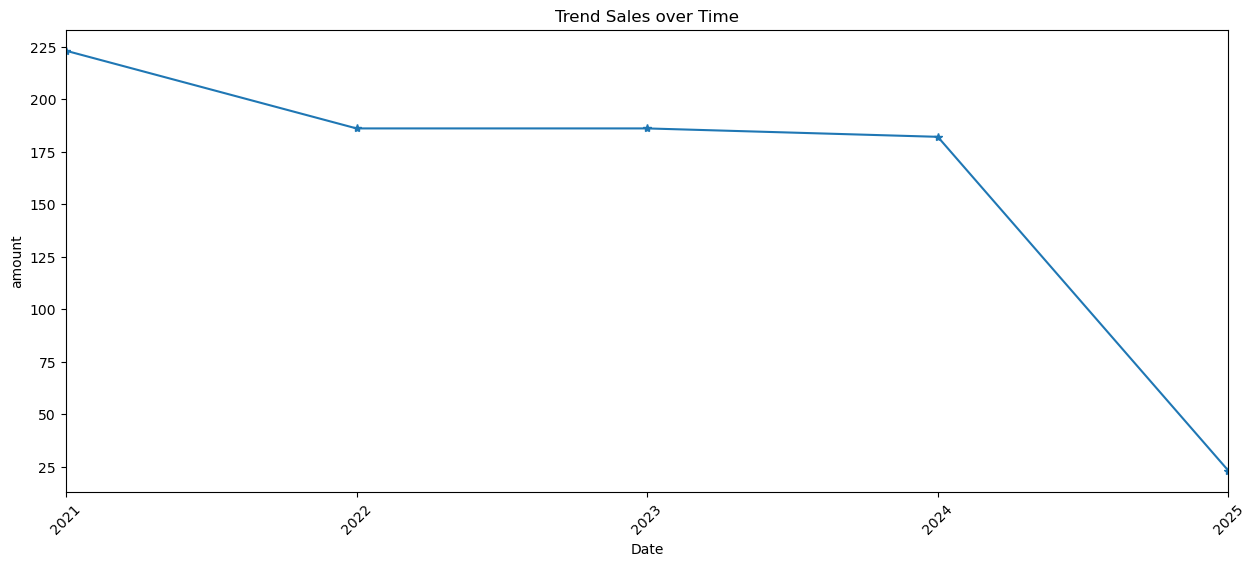

In [61]:
##Analyze order trends over time by Year.
plt.figure(figsize=(15,6))
trend_sales=df.groupby(df['order_date'].dt.to_period('Y'))['order_id'].nunique()
#all_dates=pd.date_range(start=trend_sales.index.min(), end=trend_sales.index.max())
#trend_sales=trend_sales.reindex(all_dates, fill_value=0)
trend_sales.plot(kind='line', marker='*')
plt.title('Trend Sales over Time')
plt.xlabel('Date')
plt.ylabel('amount')
plt.xticks(rotation=45)
plt.show()

In [62]:
#Find users active in consecutive months.
user_months = (
    df.assign(order_month=pd.to_datetime(df['order_date']).dt.to_period('M'))
      [['user_id', 'order_month']]
      .drop_duplicates()
      .sort_values(['user_id', 'order_month'])
)#monthly active table

user_months['prev_month'] = (user_months.groupby('user_id')['order_month'].shift(1))#previous month per user

user_months['is_consecutive'] = (user_months['order_month'] == user_months['prev_month'] + 1)#check if months are consecutive

consecutive_users = user_months.loc[user_months['is_consecutive'], 'user_id'].unique()#extract users with consecutive activity

print(f'Total active users in consecutive months: {len(consecutive_users)}')


Total active users in consecutive months: 43


In [63]:
#Identify churned users (no orders in last 6 months)
from datetime import datetime, timedelta

today=datetime(2026,2,3)#reference date
six_months_ago= today - timedelta(days=180)
user_last_purchase=df.groupby('user_id')['order_date'].max().reset_index()#user last purchase date
churned_6m=user_last_purchase[user_last_purchase['order_date']<six_months_ago]#churned users
print(f'Users Churned in the last 6 months: {len(churned_6m)}')

Users Churned in the last 6 months: 285


In [64]:
#Find peak shopping periods.
df['day_of_week']=pd.to_datetime(df['order_date']).dt.day_name()
days_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily_peaks=df.groupby('day_of_week')['order_id'].nunique().reindex(days_order)

print(f'The peak shopping order by day of the week: {daily_peaks}.')

The peak shopping order by day of the week: day_of_week
Monday        99
Tuesday      115
Wednesday     97
Thursday     125
Friday       123
Saturday     115
Sunday       126
Name: order_id, dtype: int64.


In [65]:
#Compare weekday vs weekend sales.

In [66]:
#Identify top 20% revenue-generating users.
user_revenue=df.groupby('user_id',as_index=False)['total_gross_revenue'].sum().sort_values('total_gross_revenue',ascending=False)
# total platform revenue
total_revenue = user_revenue['total_gross_revenue'].sum()

# cumulative revenue
user_revenue['cumulative_revenue'] = user_revenue['total_gross_revenue'].cumsum()

# cumulative percentage
user_revenue['cumulative_pct'] = (user_revenue['cumulative_revenue'] / total_revenue)
top_20_percent_users = user_revenue[user_revenue['cumulative_pct'] <= 0.20]

top_20_percent_users

,user_id,total_gross_revenue,cumulative_revenue,cumulative_pct
144,153,944367,944367,0.010019
106,114,931490,1875857,0.019902
262,278,930292,2806149,0.029772
205,217,905920,3712069,0.039384
23,26,905218,4617287,0.048988
99,107,881766,5499053,0.058343
102,110,863586,6362639,0.067505
94,101,854247,7216886,0.076568
249,265,842168,8059054,0.085503
130,139,834611,8893665,0.094358


In [67]:
#Perform cohort analysis by user first purchase month.
# first purchase month per user
df['order_month'] = df['order_date'].dt.to_period('M')
df['cohort_month'] = (df.groupby('user_id')['order_month'].transform('min'))

def cohort_index(df):
    year_diff = df['order_month'].dt.year - df['cohort_month'].dt.year
    month_diff = df['order_month'].dt.month - df['cohort_month'].dt.month
    return year_diff * 12 + month_diff + 1

df['cohort_index'] = cohort_index(df)
cohort_data = (df.groupby(['cohort_month', 'cohort_index'])['user_id'].nunique().reset_index())
cohort_table = cohort_data.pivot(index='cohort_month',columns='cohort_index',values='user_id')
cohort_size = cohort_table.iloc[:, 0]

retention_table = cohort_table.divide(cohort_size, axis=0)
retention_table.round(3)



cohort_index,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,49
cohort_month,,,,,,,,,,,,,,,,,,,,,
2021-01,1.0,NaN,0.071,0.143,NaN,0.071,NaN,0.071,NaN,NaN,...,NaN,NaN,0.143,NaN,0.071,0.071,NaN,0.143,0.071,0.143
2021-02,1.0,0.143,0.214,0.071,NaN,NaN,NaN,NaN,0.071,NaN,...,0.071,NaN,NaN,NaN,0.143,NaN,0.143,0.071,0.143,NaN
2021-03,1.0,0.125,NaN,NaN,0.062,0.188,0.062,0.062,0.062,NaN,...,NaN,0.125,0.125,0.062,NaN,0.188,0.125,0.062,0.062,NaN
2021-04,1.0,NaN,0.056,0.111,NaN,NaN,0.167,0.167,0.111,NaN,...,0.056,0.111,NaN,0.056,0.167,0.056,NaN,NaN,NaN,NaN
2021-05,1.0,0.143,NaN,NaN,0.071,0.143,0.071,0.071,0.143,NaN,...,0.071,0.143,NaN,NaN,NaN,0.143,0.071,0.071,NaN,NaN
2021-06,1.0,0.200,0.133,0.133,NaN,NaN,0.067,NaN,NaN,NaN,...,0.067,0.133,0.067,NaN,0.067,NaN,NaN,NaN,NaN,NaN
2021-07,1.0,NaN,0.083,NaN,NaN,0.083,NaN,NaN,NaN,0.083,...,NaN,NaN,0.083,0.167,0.083,NaN,NaN,NaN,NaN,NaN
2021-08,1.0,0.133,NaN,NaN,0.067,NaN,NaN,NaN,0.067,NaN,...,0.133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09,1.0,0.111,NaN,0.111,NaN,0.111,NaN,NaN,NaN,0.111,...,0.111,NaN,0.111,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
#Calculate customer lifetime value (CLV).
clv = df.groupby('user_id')['total_gross_revenue'].sum().reset_index().rename(columns={'total_gross_revenue': 'clv'})
clv.head()

customer_lifetime = (df.groupby('user_id')['order_date'].agg(first_purchase='min',last_purchase='max').reset_index())
customer_lifetime['lifetime_days'] = (customer_lifetime['last_purchase'] - customer_lifetime['first_purchase']).dt.days

clv_analysis = clv.merge(customer_lifetime, on='user_id')
clv_analysis.head()


,user_id,clv,first_purchase,last_purchase,lifetime_days
0,1,255101,2023-04-07,2025-01-23,657
1,3,124570,2021-02-18,2024-10-24,1344
2,4,627097,2021-04-06,2024-02-13,1043
3,5,414386,2021-03-22,2022-07-12,477
4,6,323100,2024-08-17,2024-08-17,0


In [69]:
#Identify discount-driven customers.
df['is_discounted'] = df['discount'] > 0
customer_discount = (
    df.groupby('user_id')
      .agg(
          total_orders=('order_id', 'nunique'),
          discounted_orders=('is_discounted', 'sum'),
          total_revenue=('total_gross_revenue', 'sum'),
          discounted_revenue=('total_gross_revenue',
                               lambda x: x[df.loc[x.index, 'is_discounted']].sum())).reset_index())

customer_discount['discount_order_ratio'] = (customer_discount['discounted_orders'] /
                                             customer_discount['total_orders'])

customer_discount['discount_revenue_ratio'] = (customer_discount['discounted_revenue'] / 
                                               customer_discount['total_revenue'])
discount_driven_customers = customer_discount[
    (customer_discount['discount_order_ratio'] >= 0.5) |
    (customer_discount['discount_revenue_ratio'] >= 0.5)]

discount_driven_customers.head()

,user_id,total_orders,discounted_orders,total_revenue,discounted_revenue,discount_order_ratio,discount_revenue_ratio
0,1,2,2,255101,255101,1.000000,1.000000
1,3,3,2,124570,17006,0.666667,0.136518
2,4,8,8,627097,627097,1.000000,1.000000
3,5,2,2,414386,414386,1.000000,1.000000
4,6,1,1,323100,323100,1.000000,1.000000


In [70]:
#Find users whose spending is declining over time.

monthly_spend = (df.groupby(['user_id', 'order_month'])['total_gross_revenue'].sum().reset_index().sort_values(['user_id', 'order_month']))

def spending_slope(group):
    x = np.arange(len(group))        # time index
    y = group['total_gross_revenue'].values      # monthly spend
    if len(y) < 3:                   # avoid noisy short histories
        return np.nan
    return np.polyfit(x, y, 1)[0]

user_trends = (
    monthly_spend
    .groupby('user_id')
    .apply(spending_slope)
    .reset_index(name='spending_trend')
)
declining_users = user_trends[
    user_trends['spending_trend'] < 0
].sort_values('spending_trend')

declining_users.head(10)


,user_id,spending_trend
160,169,-135167.5
143,152,-113590.0
197,209,-109914.0
56,62,-98564.0
179,189,-98314.0
68,74,-83433.0
171,181,-79994.4
158,167,-77423.8
183,194,-75105.0
246,261,-73137.7


In [71]:
#Detect abnormal purchase behavior.

In [72]:
#Simulate impact of removing discounts on revenue.

In [73]:
#Identify categories suitable for price increase.

In [74]:
#Build an e-commerce performance summary table.

In [75]:
#Create KPIs for management (AOV, CLV, retention, churn).